

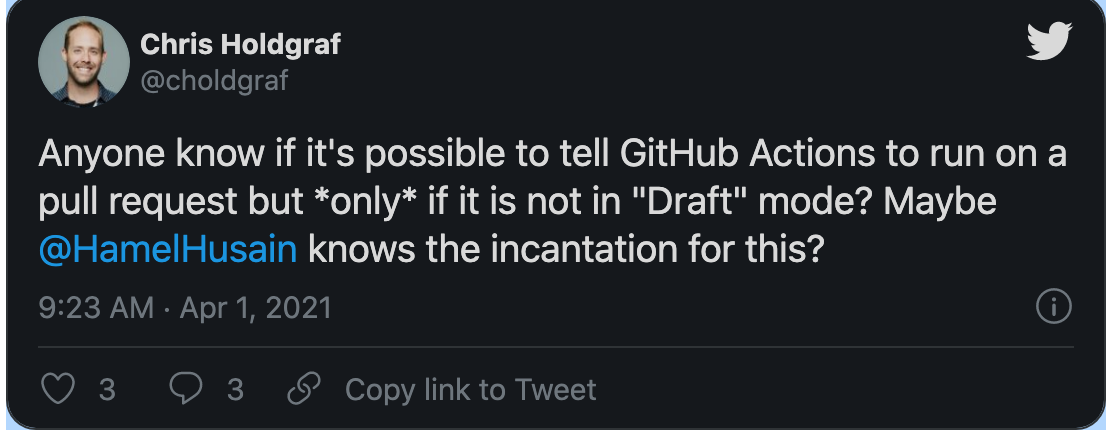
    
 <a href="https://twitter.com/choldgraf/status/1377657800315138049?ref_src=twsrc%5Etfw">Link to tweet</a>

### Answer: Let's use GHapi to find the answer!  Keep Reading 

Good question.  The difficulty with GitHub Actions is you have to inspect the payload of an event to know if the metadata exists that you are looking for.  In this case, we need to know if the event payload contains a way to filter PRs by their status as drafts.  

Getting payloads from GitHub are kind of painful.  One way is to print the payload to the logs inside Actions themselves, and inspect it, [like this](https://github.com/machine-learning-apps/actions-ml-cicd/blob/master/.github/workflows/see-payload.yaml).

But this is painful.  **A better way is to use [ghapi](https://ghapi.fast.ai/) to quickly explore different payloads!**  

In [15]:
from ghapi.event import load_sample_events
from ghapi.all import *
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

Looking at `ghpai`'s docs, I'm going to steal this [handy code](https://ghapi.fast.ai/event.html#load_sample_events) for seeing what event types there are, and I'll look at for the name of the PR event.  

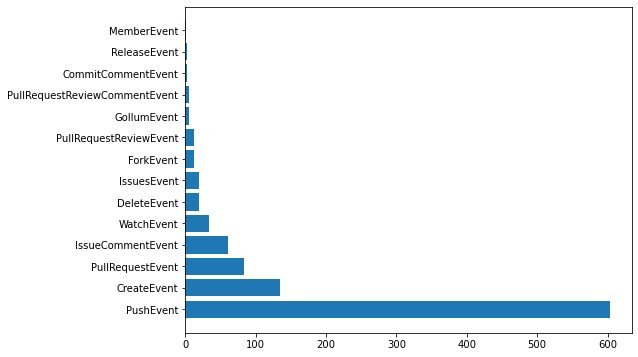

In [16]:
evts = load_sample_events()
x,y = zip(*Counter([o.type for o in evts]).most_common())
plt.figure(figsize=(8, 6))
plt.barh(x,y);

Ok, I see the event I'm looking for is called `PullRequestEvent`.  Lets grab a sample of this event.  This shows the payload for us.  Lets search this payload for `draft`, since the payload is a pretty large json, lets see what keys exist at the top level:

In [25]:
sample = evts.filter(lambda x: x.type == 'PullRequestEvent')[0]
sample.keys()

dict_keys(['id', 'type', 'actor', 'repo', 'payload', 'public', 'created_at'])

Ok we want the payload

In [27]:
sample['payload'].keys()

dict_keys(['action', 'number', 'pull_request'])

Lets look at the keys under `pull_request`

In [29]:
sample['payload']['pull_request'].keys()

dict_keys(['url', 'id', 'node_id', 'html_url', 'diff_url', 'patch_url', 'issue_url', 'number', 'state', 'locked', 'title', 'user', 'body', 'created_at', 'updated_at', 'closed_at', 'merged_at', 'merge_commit_sha', 'assignee', 'assignees', 'requested_reviewers', 'requested_teams', 'labels', 'milestone', 'draft', 'commits_url', 'review_comments_url', 'review_comment_url', 'comments_url', 'statuses_url', 'head', 'base', '_links', 'author_association', 'active_lock_reason', 'merged', 'mergeable', 'rebaseable', 'mergeable_state', 'merged_by', 'comments', 'review_comments', 'maintainer_can_modify', 'commits', 'additions', 'deletions', 'changed_files'])

Bingo!  There is a key called `draft`

In [32]:
sample['payload']['pull_request']['draft']

False

Now we can see that to know the status of a PR, we just need to reference

`github.event.pull_request.draft`

So if we wanted to filter a PR by it being draft or not, it should be something like

`if github.event.pull_request.draft == "True"`



You're welcome, @choldgraf!